In [ ]:
import pandas as pd
import numpy as np
import missingno
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

!matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

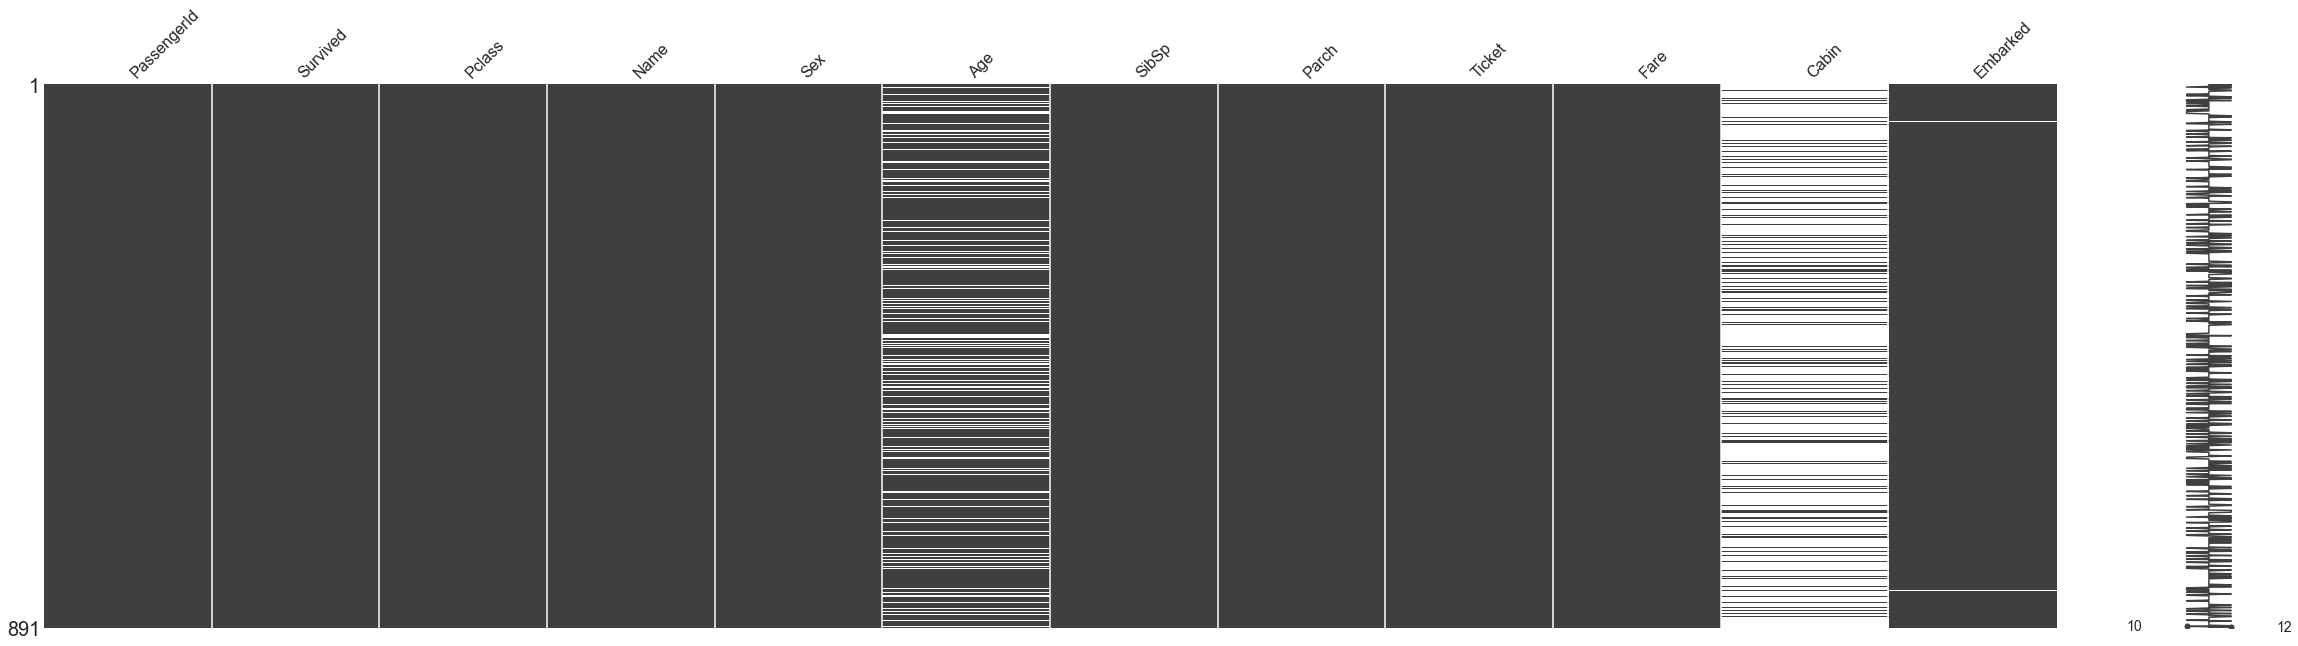

In [5]:
#Visualize missing data

missingno.matrix(train_data, figsize=(40,10))

<AxesSubplot:xlabel='count', ylabel='Survived'>

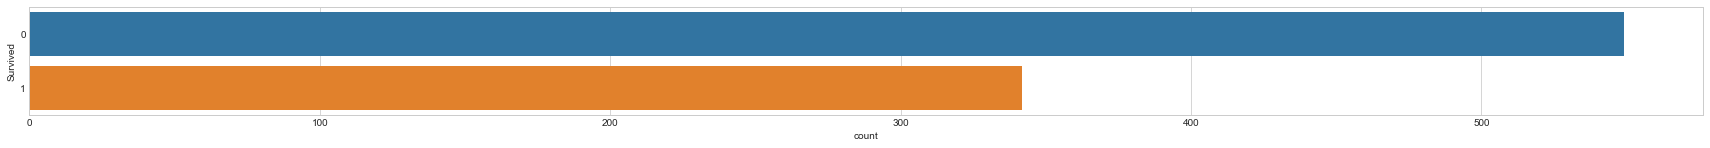

In [6]:
#How many survived

fig = plt.figure(figsize=(30,2))
sns.countplot(y='Survived', data=train_data)

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

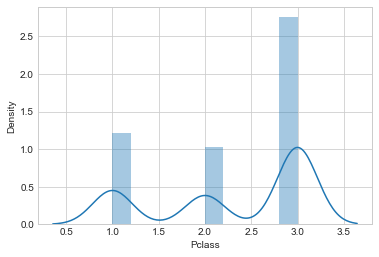

In [7]:
sns.distplot(train_data.Pclass)

<AxesSubplot:xlabel='Sex', ylabel='count'>

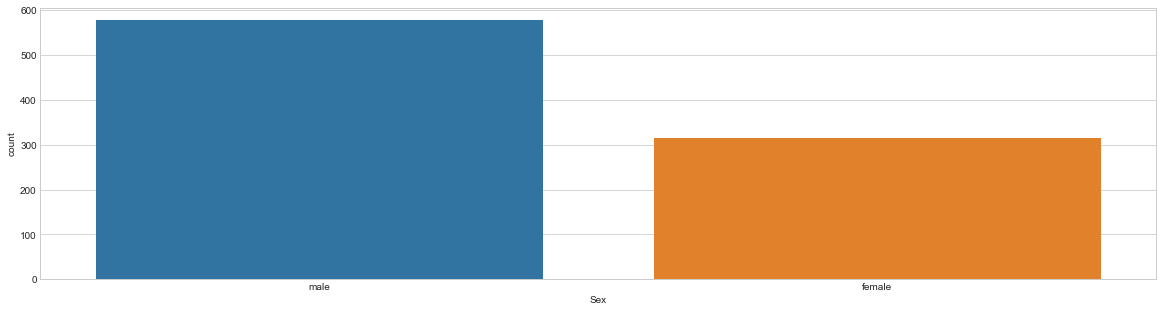

In [8]:
plt.figure(figsize=(20,5))
sns.countplot(train_data.Sex)

In [9]:
gender_split = pd.DataFrame()
gender_split['Survived'] = train_data['Survived']
gender_split['Sex'] = np.where(train_data['Sex'] == 'female', 1, 0)
gender_split


,Survived,Sex
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


<AxesSubplot:xlabel='Sex', ylabel='Density'>

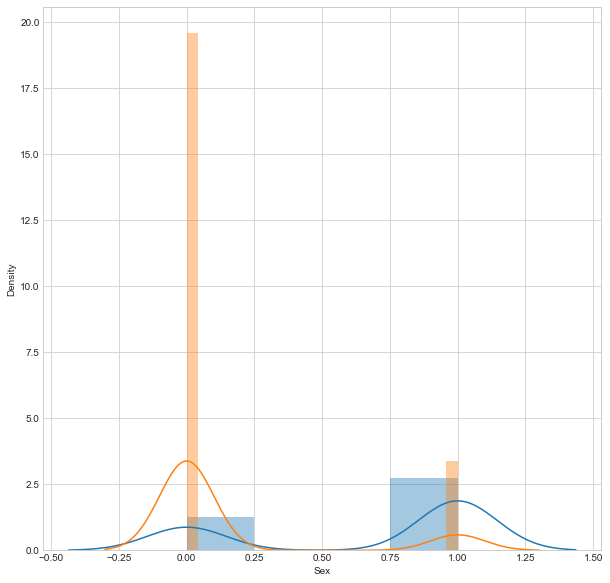

In [10]:
#Checking survival rate vs Sex

fig = plt.figure(figsize=(10,10))
sns.distplot(gender_split.loc[gender_split['Survived'] == 1]['Sex'], kde_kws ={'label': 'Survived'})
sns.distplot(gender_split.loc[gender_split['Survived'] == 0]['Sex'], kde_kws ={'label': 'Not Survived'})



In [11]:
def check_perc_survivor(gender):
    '''
    Function to calculate % of survivors by gender
    ::param_gender:: = Female or Male   
    '''
    survivor = train_data[train_data.Sex == gender].Survived
    perc_survivor = sum(survivor)/len(survivor)
    print(f'{round(perc_survivor*100)}% of {gender} survived from the Titanic')

In [12]:
check_perc_survivor('male')

19% of male surived from the Titanic


In [15]:
check_perc_survivor('female')

74% of female surived from the Titanic


In [16]:
target = train_data['Survived']

features = ['Sex', 'Pclass', 'SibSp', 'Parch']

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [17]:
X.head()


,Pclass,SibSp,Parch,Sex_female,Sex_male
0,3,1,0,0,1
1,1,1,0,1,0
2,3,0,0,1,0
3,1,1,0,1,0
4,3,0,0,0,1


In [25]:
def run_algo(selected_algorithm, X_train, y_train, cv):
    
    model = selected_algorithm.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(selected_algorithm, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# Random Forest

In [37]:

train_pred_random_forest, acc_random_forest, acc_cv_random_forest = run_algo(RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_random_forest)
print("Accuracy CV 10-Fold: %s" % acc_cv_random_forest)

Accuracy: 81.59
Accuracy CV 10-Fold: 79.12


# Logistic Regression

In [38]:
train_pred_log_reg, acc_log_reg, acc_cv_log_reg = run_algo(LogisticRegression(), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_log_reg)
print("Accuracy CV 10-Fold: %s" % acc_cv_log_reg)

Accuracy: 80.02
Accuracy CV 10-Fold: 79.91


# Decision Tree

In [39]:
train_pred_dec_tree, acc_dec_tree, acc_cv_dec_tree = run_algo(DecisionTreeClassifier(), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_dec_tree)
print("Accuracy CV 10-Fold: %s" % acc_cv_dec_tree)

Accuracy: 81.71
Accuracy CV 10-Fold: 77.67


# SVC

In [41]:
# Support Vector Machine (SVC)

train_pred_svc, acc_svc, acc_cv_svc = run_algo(LinearSVC(), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)

Accuracy: 79.35
Accuracy CV 10-Fold: 79.35


# K-Nearest Neighbours

In [42]:

train_pred_knn, acc_knn, acc_cv_knn = run_algo(KNeighborsClassifier(), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 81.14
Accuracy CV 10-Fold: 79.01


# Stochastic Gradient Descent

In [43]:

train_pred_sgd, acc_sgd, acc_cv_sgd = run_algo(SGDClassifier(), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)

Accuracy: 79.69
Accuracy CV 10-Fold: 76.77


In [44]:
train_pred_gbt, acc_gbt, acc_cv_gbt = run_algo(GradientBoostingClassifier(), 
                                                X, 
                                                target, 
                                                10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

Accuracy: 81.59
Accuracy CV 10-Fold: 79.35


In [55]:
models = {'RandomForestClassifier': acc_random_forest, 'DecisionTreeClassifier': acc_dec_tree, 'Stochastic Gradient Descent' : acc_sgd,
            'SVC' : acc_svc, 'Logistic Regression' : acc_log_reg, 'KNN': acc_knn
}

sorted(models.items())

[('DecisionTreeClassifier', 81.71),
 ('KNN', 81.14),
 ('Logistic Regression', 80.02),
 ('RandomForestClassifier', 81.59),
 ('SVC', 79.35),
 ('Stochastic Gradient Descent', 79.69)]

In [57]:
models_w_cv = {'RandomForestClassifier': acc_cv_random_forest, 'DecisionTreeClassifier': acc_cv_dec_tree, 'Stochastic Gradient Descent' : acc_cv_sgd,
            'SVC' : acc_cv_svc, 'Logistic Regression' : acc_cv_log_reg, 'KNN': acc_cv_knn
}

sorted(models_w_cv.items())

[('DecisionTreeClassifier', 77.67),
 ('KNN', 79.01),
 ('Logistic Regression', 79.91),
 ('RandomForestClassifier', 79.12),
 ('SVC', 79.35),
 ('Stochastic Gradient Descent', 76.77)]

In [58]:
#Will go for Decision Tree Classifier having higher cv
final_candidate_model = DecisionTreeClassifier()
final_candidate_model.fit(X, target)
predictions = final_candidate_model.predict(X_test)

In [59]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)

In [ ]:
final_candidate_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
final_candidate_model.fit(X, target)
predictions = final_candidate_model.predict(X_test)

In [60]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_rf.csv', index=False)

On Kaggle the Decision Tree got .76555 while Random Forest got 0.77511.